### CONVOLUTION


##### 1.1 :Write a function conv2D(img, kernel) to convolve a 2D image with a 2D kernel of size k x k (Handle padding so that the resulting image is of the same size as input).


In [1]:
# importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
# returning gray scale image given the path of image
def preprocess(input_image_path):
    image = cv2.imread(input_image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

In [117]:
import numpy as np

def conv2D_temp(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    img_padded = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    output = np.zeros_like(img)

    for i in range(img_height):
        for j in range(img_width):
            roi = img_padded[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(roi * kernel)
    
    # Clip the output
    output = np.clip(output, 0, 255)

    return output


In [3]:
# convolving image with kernel

def conv2D(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    output = np.zeros_like(img)

    # Perform convolution with zero padding
    for i in range(img_height):
        for j in range(img_width):
            roi = img[max(0, i - pad_height):min(img_height-1, i + pad_height + 1),
                      max(0, j - pad_width):min(img_width-1, j + pad_width + 1)]

            if roi.shape == kernel.shape:
                output[i, j] = np.sum(roi * kernel)
    
    # clip the output
    output = np.clip(output, 0, 255)

    return output

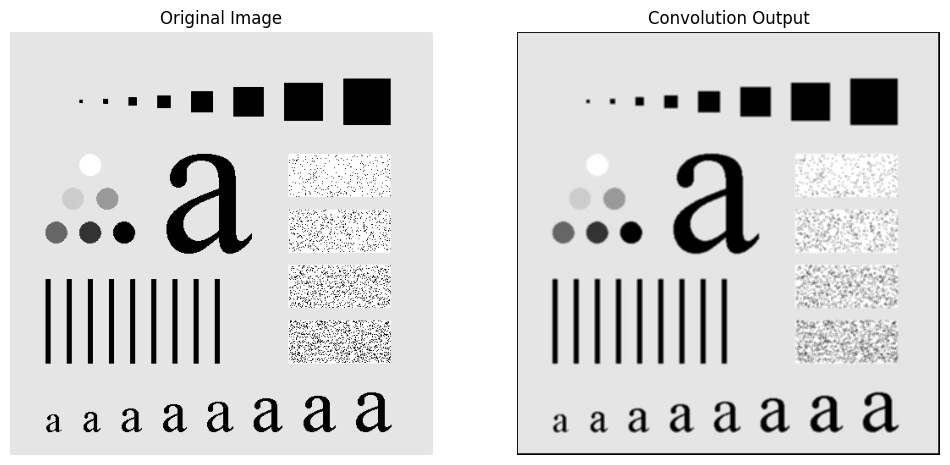

In [119]:
input_convolution1="Images/testPattern.jpg"
input_convolution1g=preprocess(input_convolution1)

k=3
kernel = np.ones((k, k), dtype=np.float32) / (k * k)
output_convolution1 = conv2D(input_convolution1g, kernel)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(input_convolution1g, cmap='gray')
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(output_convolution1, cmap='gray')
ax2.set_title("Convolution Output")
ax2.axis('off')

plt.show()


#### 1.2 Apply a Mean Filter with k=5 on IMG1 by writing a new function meanFilter() that takes in, a 2D image, kernel size, generates the appropriate kernel and filters the image using conv2D()

In [8]:
def meanFilter(img, k):
    kernel = np.ones((k, k)) / (k * k)
    filtered_img = conv2D(img, kernel)
    return filtered_img


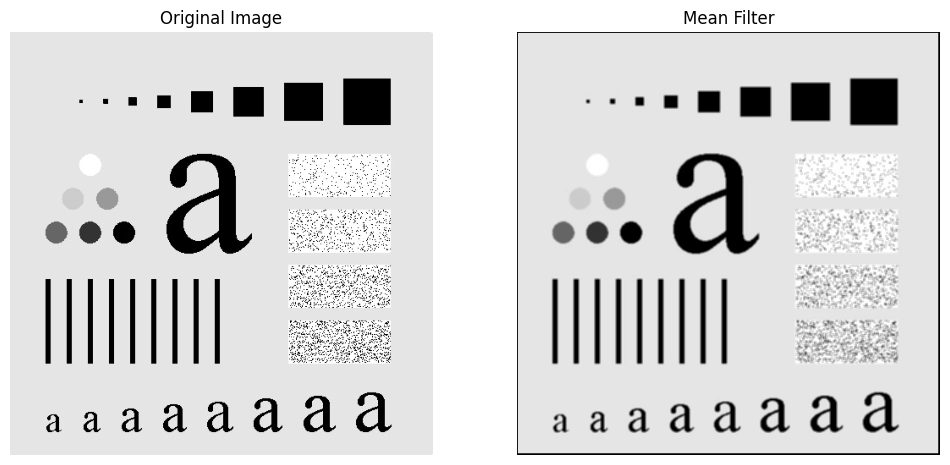

In [121]:
input_meanfilter1="Images/testPattern.jpg"
k=3
input_meanfilter1g=preprocess(input_meanfilter1)
output_meanfilter1 = meanFilter(input_meanfilter1g, k)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(input_meanfilter1g, cmap='gray')
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(output_meanfilter1, cmap='gray')
ax2.set_title("Mean Filter")
ax2.axis('off')

plt.show()

### 1.3 :  Comment on how the time taken for the operation changes with kernel size k , and image dimensions h , w


In [122]:
# kernel_sizes = [1,3,5,7,9,11,13,15,17,19,21,23,25]
# kernel_time = []

# for k in kernel_sizes:
#     start_time = time.time()
#     output = meanFilter(input_meanfilter1g, k)  # You need to define 'input_meanfilter1g' if it's not defined elsewhere
#     kernel_time.append(time.time() - start_time)

# # Create a line plot for kernel size vs. execution time
# plt.plot(kernel_sizes, kernel_time, marker='o')
# plt.xlabel('Kernel Size (k)')
# plt.ylabel('Execution Time (seconds)')
# plt.title('Runtime vs. Kernel Size for meanFilter')
# plt.grid(True)
# plt.show()

As the kernel size increases (i.e., a larger k value), the time taken for convolution generally increases.
This increase in time is because with a larger kernel, there are more multiplications and additions involved in each convolution operation as (Since the kernel is larger, there are more values to multiply the image pixels by, and more values to add together to get the final output value)


The time taken for convolution is also influenced by the dimensions of the image (height, h, and width, w).
Specifically, the time complexity of the convolution operation is directly proportional to the size of the image.
A larger image with more pixels will naturally require more computation time to perform convolution as compared to a smaller image with fewer pixels.

### 1.4  Apply Gaussian Filter with k=5 on IMG1 using conv2D() and display the results by trying different values of σ (standard deviation) and corresponding kernels

In [123]:
def generate_gaussian_kernel(sigma, size):
    kernel = np.fromfunction(
        lambda x, y: 
                     np.exp(-(((x - ((size-1)/2))**2) + ((y - ((size-1)/2))**2)) / (2 * (sigma ** 2))),
        (size, size)
    )
    return kernel / np.sum(kernel)  


In [124]:
def generate_gaussian_kernel_manual(sigma,size):
    kernel = np.zeros((size,size))
    centre=size //2
    for i in range(size):
        for j in range(size):
            distance= ((i-centre)**2+(j-centre)**2) / (2*(sigma**2))
            kernel[i,j]=np.exp(-distance) 

    return kernel / np.sum(kernel)

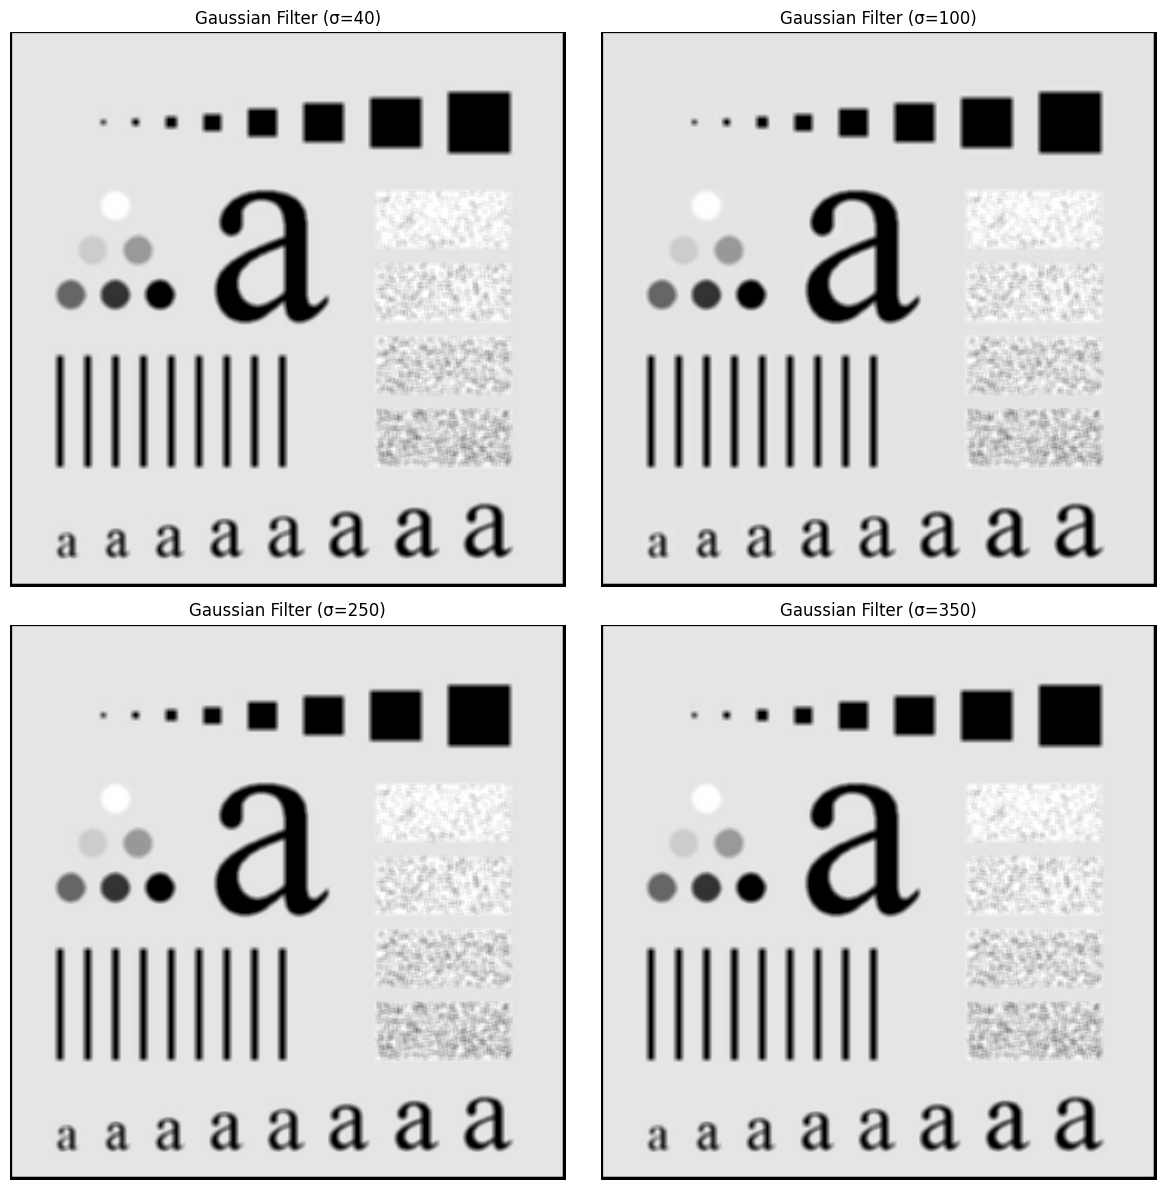

In [125]:

sigmas = [40, 100, 250, 350]

# Create a grid of subplots
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

axes[0, 0].imshow(input_meanfilter1g, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Loop through sigmas and plot filtered images in the remaining subplots
for i, sigma in enumerate(sigmas):
    row = i // num_cols
    col = i % num_cols
    kernel_size = 5
    gaussian_kernel = generate_gaussian_kernel(sigma, kernel_size)
    filtered_img = conv2D(input_meanfilter1g, gaussian_kernel)
    
    axes[row, col].imshow(filtered_img, cmap='gray')
    axes[row, col].set_title(f'Gaussian Filter (σ={sigma})')
    axes[row, col].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()


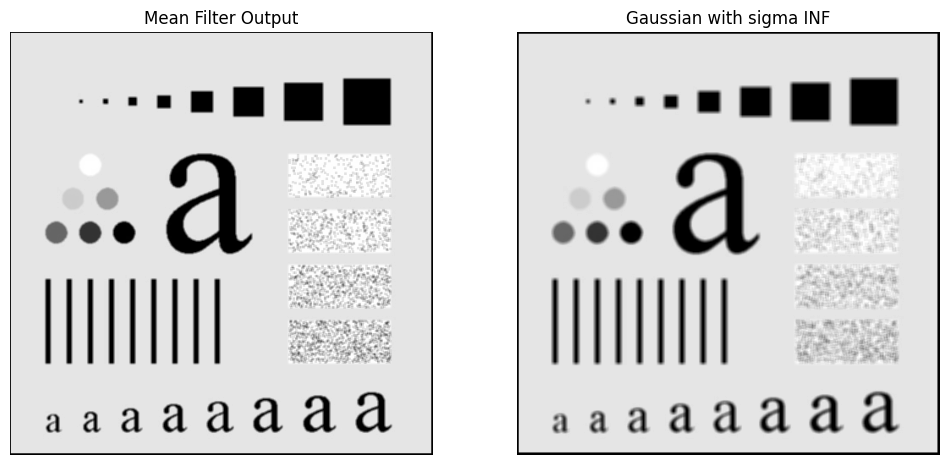

In [126]:
sigma=np.inf
kernel_size = 5
gaussian_kernel = generate_gaussian_kernel(sigma, kernel_size)
finalimage = conv2D(input_meanfilter1g, gaussian_kernel)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(output_meanfilter1, cmap='gray')
ax1.set_title("Mean Filter Output")
ax1.axis('off')

# Plot the Convolution Output on the right subplot
ax2.imshow(finalimage, cmap='gray')
ax2.set_title("Gaussian with sigma INF")
ax2.axis('off')

# Show both images in a single line
plt.show()




- As σ approaches infinity, the exponential term in the Gaussian function becomes nearly constant for all (x, y) values. This means that the weights assigned to pixel values in the neighborhood become nearly equal, regardless of their spatial position.

- When all the weights are nearly equal, the Gaussian filter essentially computes a simple average (mean) of the pixel values in the neighborhood. This is because the weighted sum of pixel values effectively becomes an unweighted sum when all the weights are approximately the same.

- In other words, as σ becomes very large, the Gaussian filter effectively assigns equal importance to all neighboring pixels, which is a characteristic of the mean filter (also known as the box filter). This is why, in the limit of large σ, the Gaussian filter behaves like a mean filter, producing a similar result where each pixel is replaced by the average of its neighbors.

### Need for Speed



In [4]:
def integral_image(image):
    integral = np.cumsum(np.cumsum(image.astype(float), axis=0), axis=1)
    return integral

In [9]:
def speedyMeanFilter(image, kernel_size):
    height, width = image.shape
    half_kernel = kernel_size // 2
    result = np.zeros_like(image, dtype=float)

    for y in range(height):
        for x in range(width):
            x1, y1 = max(0, x - half_kernel), max(0, y - half_kernel)
            x2, y2 = min(width - 1, x + half_kernel), min(height - 1, y + half_kernel)

            x1, y1, x2, y2 = max(x1, 0), max(y1, 0), min(x2, width - 1), min(y2, height - 1)

            sum_kernel = image[y2, x2] - image[y2, x1] - image[y1, x2] + image[y1, x1]
            result[y, x] = sum_kernel / (kernel_size*kernel_size)

    # clip the result
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)


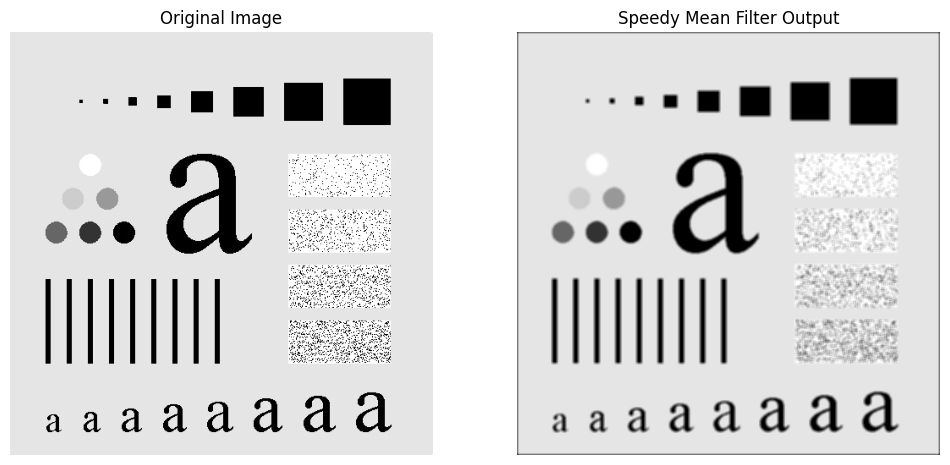

In [6]:
input_needforspeed="Images/testPattern.jpg"
input_needforspeedg=preprocess(input_needforspeed)
integralimage= integral_image(input_needforspeedg)
output_needforspeed = speedyMeanFilter(integralimage,5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(input_needforspeedg, cmap='gray')
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(output_needforspeed, cmap='gray')
ax2.set_title("Speedy Mean Filter Output")
ax2.axis('off')

# Show both images in a single line
plt.show()


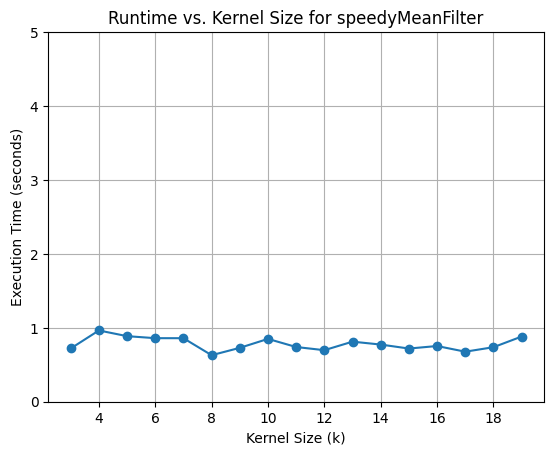

In [13]:
kernel_sizes = list(range(3, 20)) 

execution_times = []

for kernel_size in kernel_sizes:
    start_time = time.time()
    smoothed_image = speedyMeanFilter(integralimage, kernel_size)
    end_time = time.time()
    
    execution_time = end_time - start_time
    execution_times.append(execution_time)

plt.plot(kernel_sizes, execution_times, marker='o')
plt.xlabel('Kernel Size (k)')
plt.ylabel('Execution Time (seconds)')
plt.title('Runtime vs. Kernel Size for speedyMeanFilter')
plt.ylim(0,5)
plt.grid(True)
plt.show()

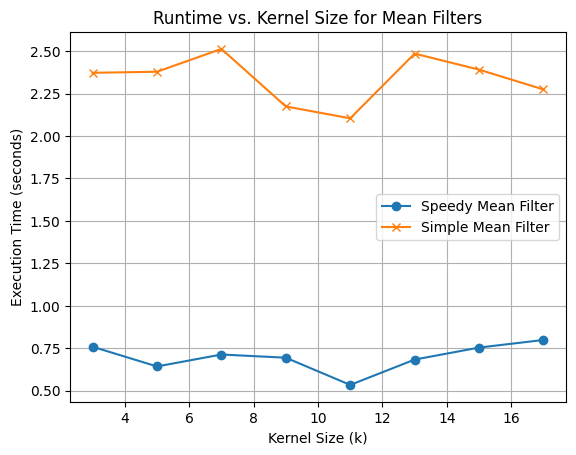

In [12]:
# Define a list of odd kernel sizes
kernel_sizes = list(range(3, 18, 2))

# Lists to store execution times for both filters
speedy_execution_times = []
simplemean_execution_times = []

for kernel_size in kernel_sizes:
    start_time = time.time()
    smoothed_image_speedy = speedyMeanFilter(integralimage, kernel_size)
    end_time = time.time()
    speedy_execution_time = end_time - start_time
    speedy_execution_times.append(speedy_execution_time)

    start_time = time.time()
    smoothed_image_simple = meanFilter(integralimage, kernel_size)
    end_time = time.time()
    simple_execution_time = end_time - start_time
    simplemean_execution_times.append(simple_execution_time)

plt.plot(kernel_sizes, speedy_execution_times, marker='o', label='Speedy Mean Filter')
plt.plot(kernel_sizes, simplemean_execution_times, marker='x', label='Simple Mean Filter')

plt.xlabel('Kernel Size (k)')
plt.ylabel('Execution Time (seconds)')
plt.title('Runtime vs. Kernel Size for Mean Filters')
plt.legend()
plt.grid(True)
plt.show()


### Salt and Pepper
#### 1 Identify the type of noise added to IMG2 and apply the appropriate filters to remove the noise.


From observation we can see that the noise is pepper . To remove pepper noise we would use dilation or max filter. Here we choose the kernel size to be 3x3 and assign each cell the max value of the 3x3 neighborhood. This is done using the max() function.

In [131]:
def removePepperNoiseinbuilt(img):
    denoised_img = cv2.dilate(img, None, iterations=1)
    return denoised_img

In [132]:
def removePepperNoisemanual (img):
    denoised_img = np.zeros_like(img)
    height, width = img.shape
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            roi = img[i - 1:i + 2, j - 1:j + 2]
            max = np.max(roi)
            denoised_img[i, j] = max 
    return denoised_img

    

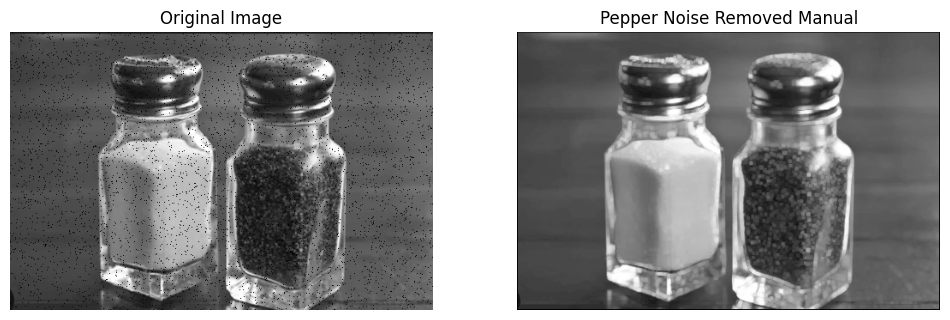

In [133]:
# INPUT IMAGE
input_saltpepper1="Images/salt_noise.png"
input_saltpepper1g=preprocess(input_saltpepper1)

# output_removepepperinbuilt=removePepperNoiseinbuilt(input_saltpepper1g)
output_removepeppermanual=removePepperNoisemanual(input_saltpepper1g)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(input_saltpepper1g, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_removepeppermanual, cmap='gray')
plt.title("Pepper Noise Removed Manual")
plt.axis('off')

plt.show()


#### 3.2 2. Identify the type of noise added to IMG3 and apply the appropriate filters to remove the noise

From observation we can see that the noise is salt . To remove salt noise we would use erosion or min filter. Here we choose the kernel size to be 3x3 and assign each cell the min value of the 3x3 neighborhood. This is done using the min() function.

In [134]:
def removeSaltNoiseinbuilt (img):
    denoised_img = cv2.erode(img, None, iterations=1)
    return denoised_img

In [135]:
def removeSaltNoiseManual (img):
    denoised_img=np.zeros_like(img)
    height,width=img.shape
    for i in range(1,height-1):
        for j in range(1,width-1):
            roi=img[i-1:i+2,j-1:j+2]
            min=np.min(roi)
            denoised_img[i,j]=min
    
    return denoised_img

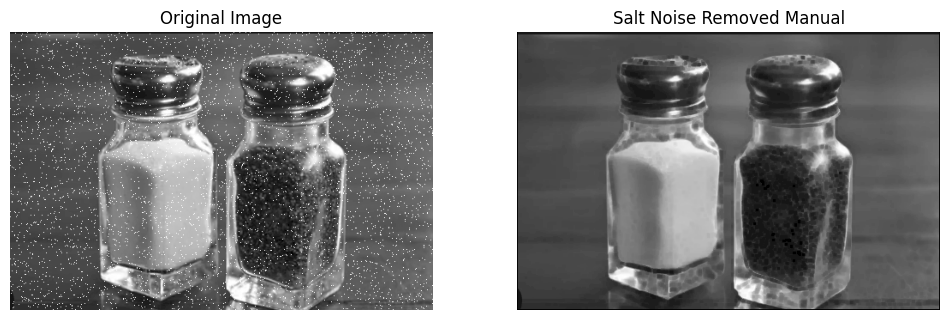

In [136]:
input_saltpepper2="Images/pepper_noise.png"
input_saltpepper2g=preprocess(input_saltpepper2)

# output_removesaltinbuilt=removeSaltNoiseinbuilt(input_saltpepper2g)
output_removesaltmanual=removeSaltNoiseManual(input_saltpepper2g)

# Create a single figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(input_saltpepper2g, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(output_removesaltmanual, cmap='gray')
axes[1].set_title("Salt Noise Removed Manual")
axes[1].axis('off')

plt.show()


### 3.2 3. Identify the type of noise added to IMG4 and apply the appropriate filters to remove the noise

From observation we can see that the noise is both salt & pepper . To remove this we would use median filter. Here we choose the kernel size to be 3x3 and assign each cell the median value of the 3x3 neighborhood. This is done using the median() function.

In [137]:
def removeSaltPepperNoiseinbuilt (img):
    denoised_img = cv2.medianBlur(img, 5)
    return denoised_img

In [138]:
def removeSaltPepperNoiseManual (img):
    denoised_img=np.zeros_like(img)
    height,width=img.shape
    for i in range(1,height-1):
        for j in range(1,width-1):
            roi=img[i-1:i+2,j-1:j+2]
            median=np.median(roi)
            denoised_img[i,j]=median
    
    return denoised_img

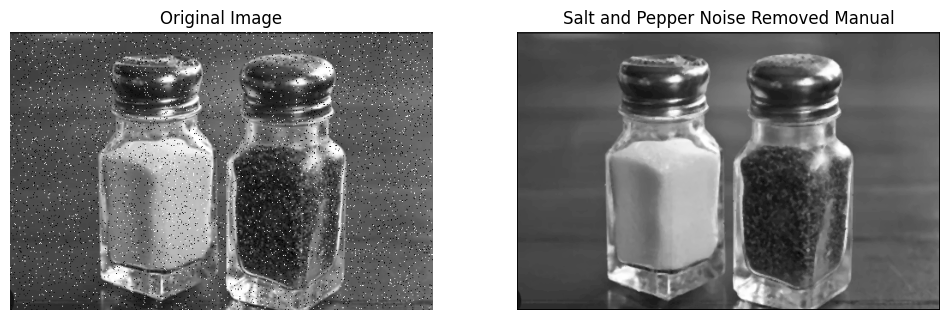

In [139]:
input_saltpepper3 ="Images/salt_and_pepper_noise.png"
input_saltpepper3g=preprocess(input_saltpepper3)

# output_removesaltpepperinbuilt=removeSaltPepperNoiseinbuilt(input_saltpepper3g)
output_removesaltpeppermanual=removeSaltPepperNoiseManual(input_saltpepper3g)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(input_saltpepper3g, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(output_removesaltpeppermanual, cmap='gray')
axes[1].set_title("Salt and Pepper Noise Removed Manual")
axes[1].axis('off')

plt.show()

### Blurry ? Don't Worry


#### Implement a function sharpen(img, A, k) to perform Un-sharp Masking/ Highboost Filtering on an Image as per required kernel size and the amplifying factor.

### Unsharp Masking

In [140]:
def gaussianBlur(img, k):
    return cv2.GaussianBlur(img, (k, k), 0)


def gaussainBlurmanual(img,k):
    kernel_size = k
    sigma = 1
    kernel = np.fromfunction(
    lambda x, y: np.exp(-((x - (k)//2)**2 + (y - (k)//2)**2) / (2 * (sigma**2))),
    (kernel_size, kernel_size)
    )
    kernel /= np.sum(kernel)  # Normalize the kernel
    return conv2D(img, kernel)

In [141]:
def unsharp_highboost_masking_mean (img,A,K):    
    blurred_img = meanFilter(img, K)
    highpass_img = img - blurred_img
    output_img = img + A * highpass_img
    output_img = np.clip(output_img, 0, 255)
    return output_img

def unsharp_highboost_masking_gaussian(img, A, k):
    kernel=generate_gaussian_kernel_manual(1,k)
    blurred_img =conv2D(img, kernel)
    highpass_img = img - blurred_img
    output_img = img + A * highpass_img
    output_img = np.clip(output_img, 0, 255)
    return output_img


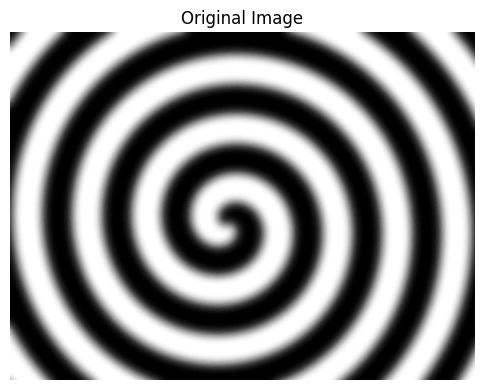

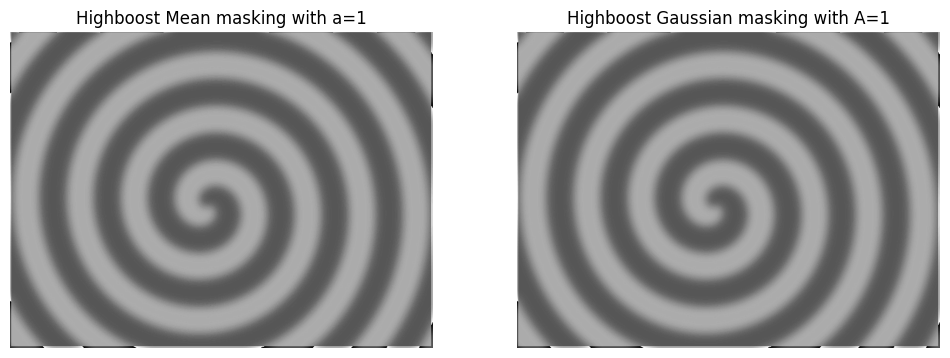

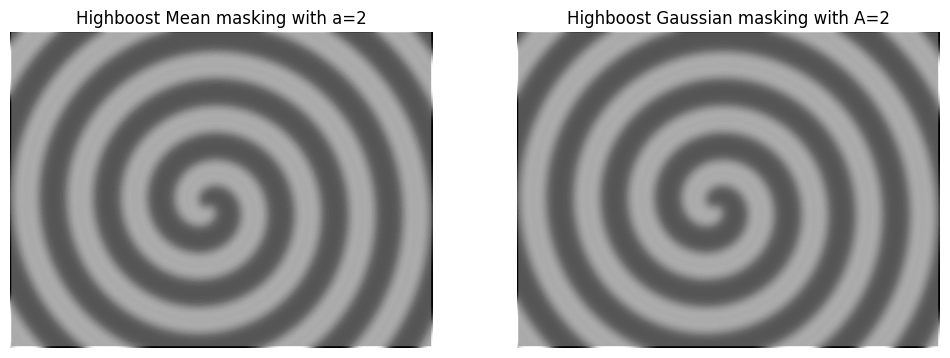

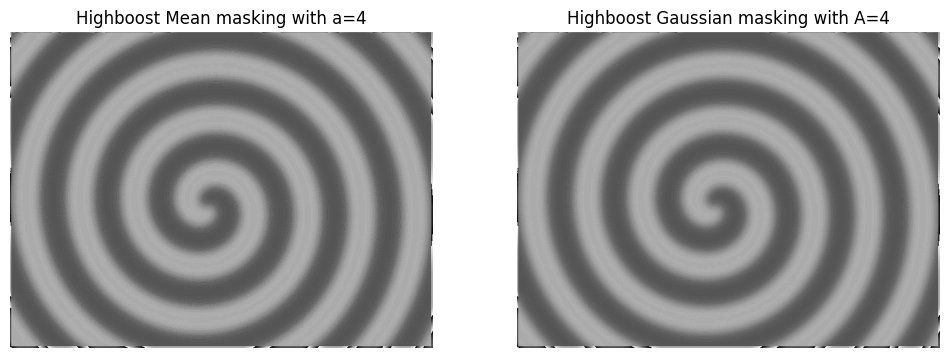

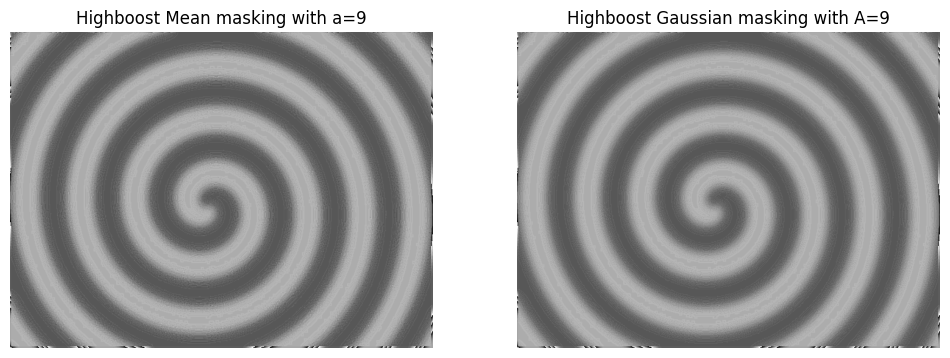

In [142]:
input_Blurry="Images/blurry_spiral.png"
input_Blurryg= preprocess(input_Blurry)

k=5
A=[1,2,4,9]

plt.figure(figsize=(6, 6))
plt.imshow(input_Blurryg, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


for a in A:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    output_Blurry_mean = unsharp_highboost_masking_mean(input_Blurryg, a, k)
    axes[0].imshow(output_Blurry_mean, cmap='gray')
    axes[0].set_title("Highboost Mean masking with a=" + str(a))
    axes[0].axis('off')

    # Display the Highboost Gaussian masking image in the second subplot
    output_Blurry_gaussian = unsharp_highboost_masking_gaussian(input_Blurryg, a, k)
    axes[1].imshow(output_Blurry_gaussian, cmap='gray')
    axes[1].set_title("Highboost Gaussian masking with A=" + str(a))
    axes[1].axis('off')

    plt.show()
  

1. Mean (Box) Filter for High Boost:

The mean filter acted as a  simple smoothing filter that replaces each pixel's value with the average of the surrounding pixel values within a kernel.
When used for high boost filtering, the mean filter enhanced the edges in the image by subtracting a blurred version of the image from the original.
The effect is typically a stronger emphasis on edges and fine details. However, it can lead to enhanced noise since the mean filter does not distinguish between noise and edges.

2. Gaussian Filter for High Boost:

The Gaussian filter, on the other hand, is a more sophisticated smoothing filter that assigns higher weights to pixels closer to the center of the kernel, creating a weighted average. When used for high boost filtering, the Gaussian filter also enhances edges by subtracting a smoothed version of the image from the original. The Gaussian filter is often preferred for high boost filtering because it tends to produce smoother and more visually pleasing results compared to the mean filter. It reduces the risk of enhancing noise as much as the mean filter.

### COUNTING COINS

In [143]:

# Define the kernels
kernel_x_prewitt = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])

kernel_y_prewitt = np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])

kernel_x_sobel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

kernel_y_sobel = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

kernel_laplacian = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

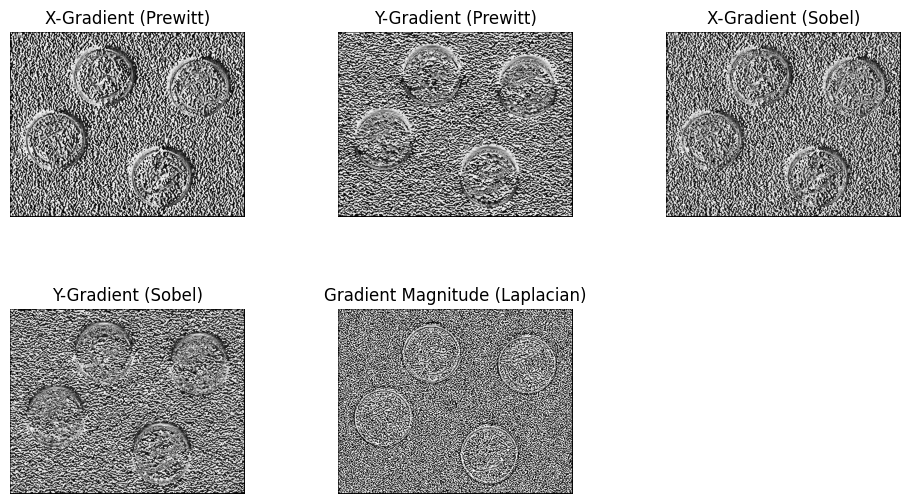

In [144]:
input_countingcoins="Images/coins.PNG"
input_countingcoinsg=preprocess(input_countingcoins)

# Convolve the image with the kernels
gradient_x_prewitt = conv2D(input_countingcoinsg,  kernel_x_prewitt)
gradient_y_prewitt = conv2D(input_countingcoinsg,  kernel_y_prewitt)

gradient_x_sobel = conv2D(input_countingcoinsg,  kernel_x_sobel)
gradient_y_sobel = conv2D(input_countingcoinsg,  kernel_y_sobel)

gradient_laplacian = conv2D(input_countingcoinsg, kernel_laplacian)

# Calculate the gradient magnitude for Laplacian
gradient_magnitude = conv2D(input_countingcoinsg,kernel_laplacian)
gradient_magnitude = np.abs(gradient_magnitude)


plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(gradient_x_prewitt,cmap='gray')
plt.title('X-Gradient (Prewitt)')
plt.axis('off')


plt.subplot(2, 3, 2)
plt.imshow(gradient_y_prewitt, cmap='gray')
plt.title('Y-Gradient (Prewitt)')
plt.axis('off')


plt.subplot(2, 3, 3)
plt.imshow(gradient_x_sobel, cmap='gray')
plt.title('X-Gradient (Sobel)')
plt.axis('off')


plt.subplot(2, 3, 4)
plt.imshow(gradient_y_sobel, cmap='gray')
plt.title('Y-Gradient (Sobel)')
plt.axis('off')


plt.subplot(2, 3, 5)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude (Laplacian)')
plt.axis('off')


plt.subplots_adjust(hspace=0.5)
plt.axis('off')
plt.show()

- Sobel and Prewitt Edge Detection: Both Sobel and Prewitt edge detection techniques are directional. They are designed to find edges in images by emphasizing the direction of the edge.
In the case of Prewitt, it applies a pair of filters: one for detecting vertical edges and the other for horizontal edges. This means you get two separate filtered images as output. Sobel, on the other hand, also produces two filtered images, but it tends to provide more detailed and edge-sensitive results compared to Prewitt.

- Laplacian Edge Detection: Laplacian edge detection is different from Sobel and Prewitt in that it doesn't emphasize a specific direction of edges.
When you apply the Laplacian kernel, the output typically contains both positive and negative edge values. Zero values indicate regions in the image with little intensity change, which means they are not considered as strong edges.

### HURRY ! MAKE IT BLURRY

In [145]:
def bilateralFilter(img, k, sigma_s, sigma_r):
    filtered_img = cv2.bilateralFilter(img, d=k, sigmaColor=sigma_r, sigmaSpace=sigma_s)
    
    return filtered_img

In [146]:
def bilateralFilterManual(img, spatial_sigma, intensity_sigma, kernel_size):
    height, width = img.shape
    kernel_half = kernel_size // 2
    output = np.zeros_like(img)

    for x in range(height):
        for y in range(width):
            x_min = max(x - kernel_half, 0)
            x_max = min(x + kernel_half + 1, height)
            y_min = max(y - kernel_half, 0)
            y_max = min(y + kernel_half + 1, width)

            window = img[x_min:x_max, y_min:y_max]

            spatial_factor = np.exp(-((np.arange(x_min - x, x_max - x)[:, np.newaxis] ** 2 +
                          (np.arange(y_min - y, y_max - y) ** 2)) / (2 * (spatial_sigma ** 2))))

            intensity_factor = np.exp(-(window - img[x, y]) ** 2 / (2 * (intensity_sigma ** 2)))


            combined_factor = spatial_factor * intensity_factor

            normalized_factor = combined_factor / np.sum(combined_factor)

            output[x, y] = np.sum(window * normalized_factor)

    return (output).astype(np.uint8)  


(-0.5, 235.5, 184.5, -0.5)

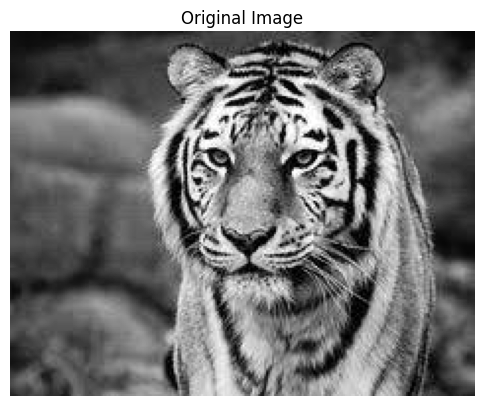

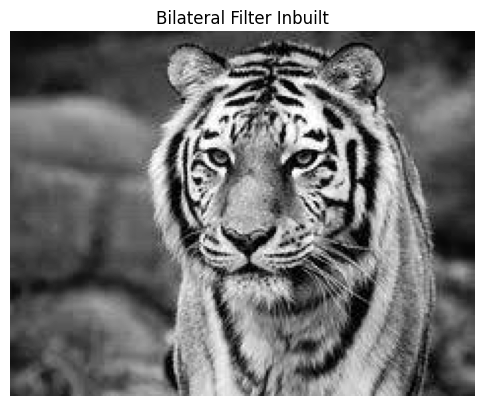

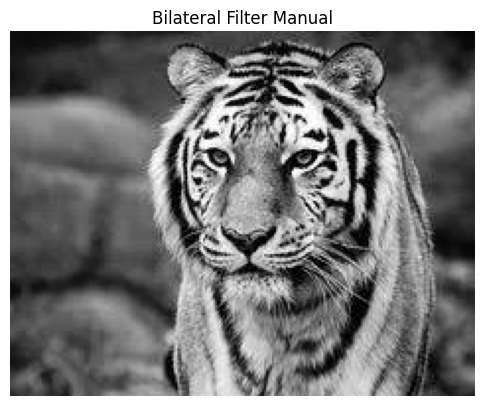

In [147]:
input_hurryBlurry="Images/tiger.jfif"
input_hurryBlurryg=preprocess(input_hurryBlurry)
# convert to float
input_hurryBlurryg = input_hurryBlurryg.astype(np.float32)

k=3
sigma_s=2
sigma_r=2

output_hurryBlurryinbuilt=bilateralFilter(input_hurryBlurryg, k, sigma_s, sigma_r)
output_hurryBlurrymanual=bilateralFilterManual(input_hurryBlurryg, k, sigma_s, sigma_r)

plt.figure(figsize=(6, 6))
plt.imshow(input_hurryBlurryg, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.figure(figsize=(6, 6))
plt.imshow(output_hurryBlurryinbuilt, cmap='gray')
plt.title("Bilateral Filter Inbuilt")
plt.axis('off')

plt.figure(figsize=(6, 6))
plt.imshow(output_hurryBlurrymanual, cmap='gray')
plt.title("Bilateral Filter Manual")
plt.axis('off')

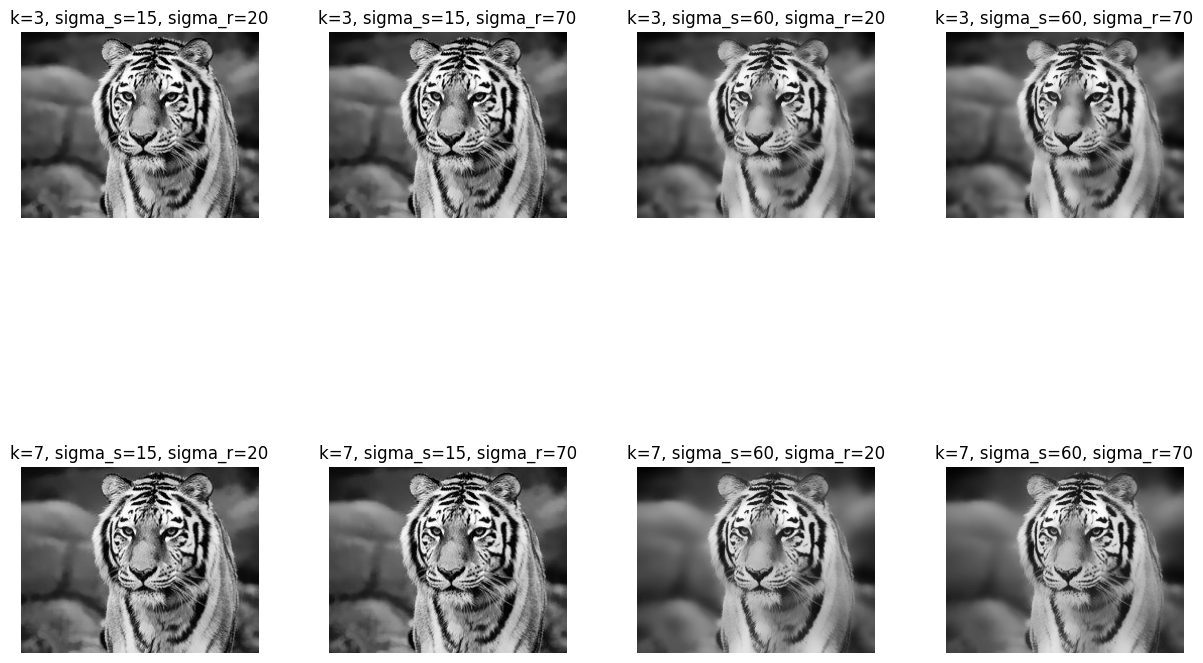

In [148]:

k_values = [3,7]
sigma_s_values = [15,60]
sigma_r_values = [20,70]

fig, axs = plt.subplots(len(k_values), len(sigma_s_values) * len(sigma_r_values), figsize=(15, 10))

for i, k in enumerate(k_values):
    for j, sigma_s in enumerate(sigma_s_values):
        for l, sigma_r in enumerate(sigma_r_values):
            
            result = bilateralFilterManual(input_hurryBlurryg, k, sigma_s, sigma_r)
            axs[i, j * len(sigma_r_values) + l].imshow(result, cmap='gray')
            axs[i, j * len(sigma_r_values) + l].set_title(f'k={k}, sigma_s={sigma_s}, sigma_r={sigma_r}')
            axs[i, j * len(sigma_r_values) + l].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


1. Smoothing Effect:

- Gaussian Filter: It employs a simple weighted average of neighboring pixel values based on their proximity, resulting in a smooth but potentially less edge-preserving effect. Gaussian filtering treats all pixels within the kernel equally.

- Bilateral Filter: It takes into account both spatial proximity and pixel intensity similarity. This means it smooths the image while preserving edges and fine details. The bilateral filter offers superior edge-preserving capabilities.

2. Edge Preservation:

- Gaussian Filter: While Gaussian filtering can smooth an image effectively, it tends to blur edges and may not adequately preserve important image details.

- Bilateral Filter: The bilateral filter excels at preserving edges by considering the difference in pixel values within the kernel. It attenuates smoothing across edges, resulting in clearer and sharper edges in the output image.

3. Noise Reduction:

- Gaussian Filter: It can reduce noise in an image to some extent, but it may also blur fine details, including those that are not noise.

- Bilateral Filter: The bilateral filter is particularly effective at noise reduction because it distinguishes between noise and actual edges based on pixel intensity differences. This allows it to smooth noise while retaining image details.

4. Parameter Sensitivity:

- Gaussian Filter: Gaussian filtering relies primarily on the kernel size, with a larger kernel producing stronger smoothing. It is less sensitive to other parameters.

- Bilateral Filter: The bilateral filter introduces additional parameters, including a spatial sigma and intensity sigma. These parameters provide finer control over the degree of smoothing and edge preservation, making it more versatile but potentially requiring careful tuning.